# Introduction 

Point of this file is to help us derive some hyperparameters we can use for our model.

First: the derivation of the foundational $\Delta$ we will use to train the classification model 

In [1]:
from sampleddetection.readers.readers import CSVReader
from collections import defaultdict
import pandas as pd
from tqdm import tqdm_notebook as tqdm 


# Make sure these are reloaded when cells are rerun
%load_ext autoreload
%autoreload 2

In [2]:
# Some of the constants to use

csv_path = './data/Wednesday-workingHours.pcap_ISCX.csv'

In [3]:
# First, loaf the csv file we will run the computations on
csvreader = pd.read_csv(csv_path, low_memory=False)

In [5]:
# Loop for calculation 
mean_iats = defaultdict(list)
labels = []
bar = tqdm(total=len(csvreader), desc="Calculating over entirety of csv file")
max = 1e-6
min = 1e6

# Remove from dataframe rows with Mean Iat less than 0 
df = csvreader[csvreader[' Flow IAT Mean'] > 0].reset_index(drop=True)
# Count offenders 
offenders = len(csvreader) - len(df)
print(f"We found {offenders}")

for pidx in range(len(df)):
    iat = df.loc[pidx,' Flow IAT Mean'] 
    label = df.loc[pidx,' Label']
    max = max if max > iat else iat
    min = min if min < iat else iat

    mean_iats[label].append(iat)
    bar.update(1)

print(f"Max and Min values of mean IAT are: max={max}, min={min}")


/var/folders/_c/l7slpvfj7f1f3xrbzl_7c9440000gn/T/ipykernel_13401/3343203536.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  bar = tqdm(total=len(csvreader), desc="Calculating over entirety of csv file")


Calculating over entirety of csv file:   0%|          | 0/692703 [00:00<?, ?it/s]

We found 1318
Max and Min values of mean IAT are: max=120000000.0, min=0.5


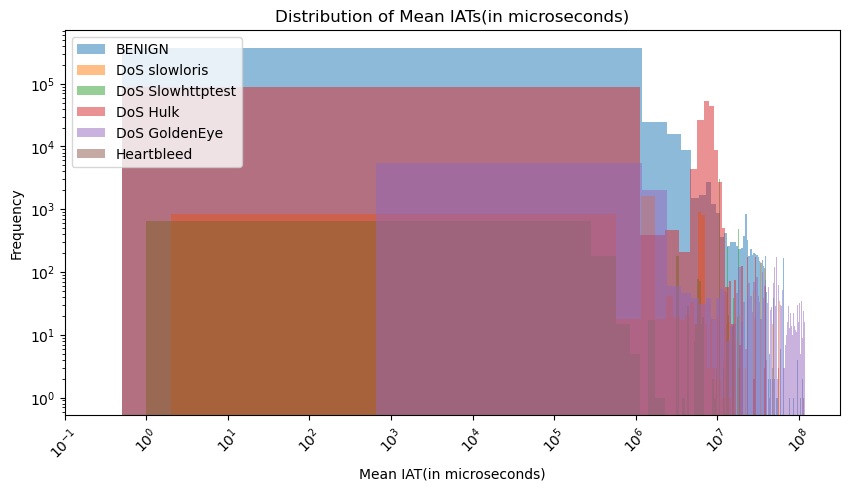

In [13]:
# Dsitribution plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
for k,v in mean_iats.items():
    plt.hist(v, bins=100, alpha=0.5, label=k)
    # Log the y axis and include negative exponents


plt.yscale('log')
# Include negative exponents for x axis(e.g. 10^-1, 10^-2) (set ticks)
plt.xscale('log')
plt.xticks([ 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8], rotation=45)
plt.legend()
plt.title("Distribution of Mean IATs(in microseconds)")
plt.xlabel("Mean IAT(in microseconds)")
plt.ylabel("Frequency")
plt.show()


In [ ]:
# Let me just read the csv that I formed and then separete things into bins
mycsv_path = './data/Wednesday.csv'
my_csvreader = CSVReader(csv_path)


In [ ]:
# Now we separete packets into bins according to their labels
packets = defaultdict(list)
for packet in my_csvreader:
    packets[packet.label].append(packet.time/1e6)
# Calculate interarrival times
iats = {k: [] for k in packets.keys()}
for k, v in packets.items():
    for i in range(1, len(v)):
        iats[k].append(v[i] - v[i-1])

In [ ]:
# Plot the distribution of interarrival times
plt.figure(figsize=(10, 5))
for k,v in iats.items():
    plt.hist(v, bins=100, alpha=0.5, label=k)
    # Log the y axis and include negative exponents

plt.yscale('log')
# Include negative exponents for x axis(e.g. 10^-1, 10^-2) (set ticks)
plt.xscale('log')
plt.xticks([ 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8], rotation=45)
plt.legend()
plt.title("Distribution of Interarrival Times(in microseconds)")
plt.xlabel("Interarrival Time(in microseconds)")
plt.ylabel("Frequency")
plt.show()
